In [1]:
import numpy as np
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('NSE-TATAGLOBAL.csv')

In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [6]:
df.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [7]:
df1 = df.reset_index()['Close']

In [8]:
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

# Data visualisation

<AxesSubplot:>

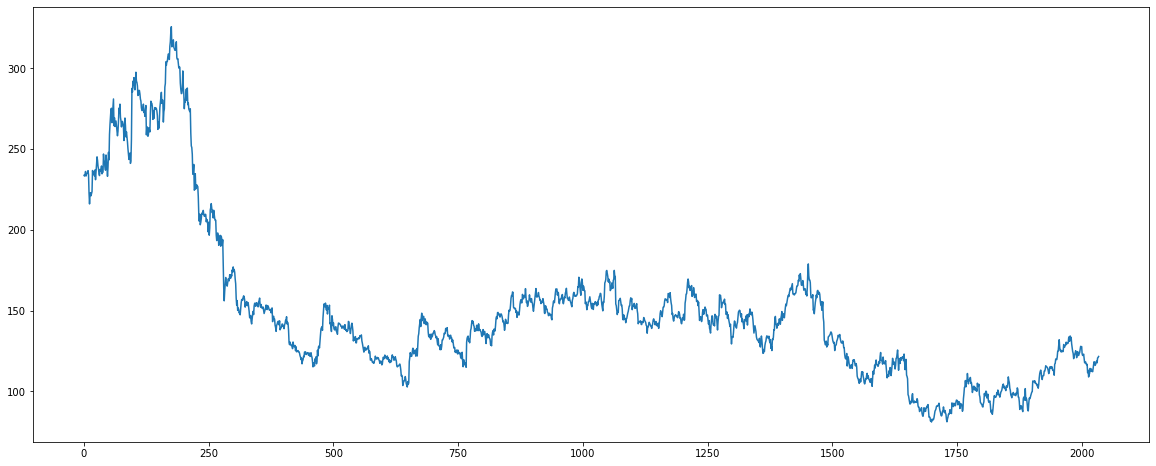

In [9]:
df['Close'].plot(figsize=(20,8))

C:\Users\DHRUPAD CHAKRABORTY\AppData\Local\Temp\ipykernel_12380\336086850.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  df.rolling(7).mean().head(15)
C:\Users\DHRUPAD CHAKRABORTY\AppData\Local\Temp\ipykernel_12380\336086850.py:4: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  df.rolling(window=30).mean()['Open'].plot()


<AxesSubplot:>

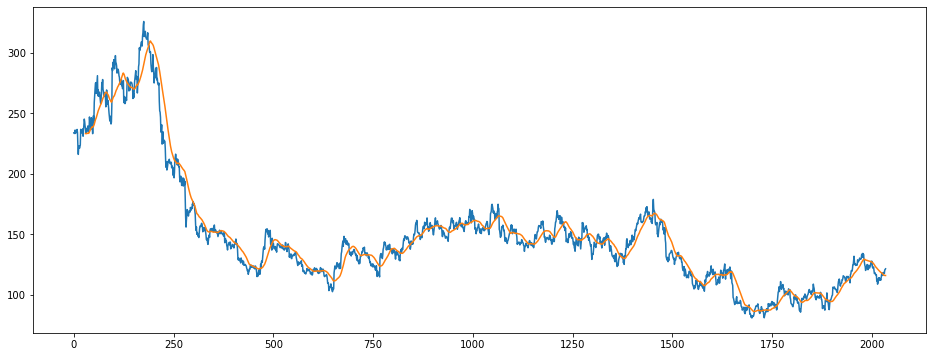

In [10]:
# Rolling mean
df.rolling(7).mean().head(15)
df['Close'].plot(figsize=(16,6))
df.rolling(window=30).mean()['Open'].plot()

# Data Scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1) )
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
df1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

# Splitting dataset into train and test data

In [13]:
train_size = int(len(df1)*0.75)
test_size = len(df1) - train_size
train_size, test_size

(1526, 509)

In [14]:
train_data, test_data = df1[0:train_size: ], df1[train_size:len(df1), :1]

# Convert array of values into dataset matrix

In [15]:
def create_dataset(dataset, time_step = 1):
    data_x, data_y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step),0]
        data_x.append(a)
        data_y.append(dataset[i+time_step,0])
    return numpy.array(data_x), numpy.array(data_y)

# Reshape into x = t,t+1,t+2....

In [16]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [17]:
x_train, y_train

(array([[0.62418301, 0.62214052, 0.62622549, ..., 0.83455882, 0.86213235,
         0.85273693],
        [0.62214052, 0.62622549, 0.63378268, ..., 0.86213235, 0.85273693,
         0.87111928],
        [0.62622549, 0.63378268, 0.62234477, ..., 0.85273693, 0.87111928,
         0.84497549],
        ...,
        [0.32271242, 0.3247549 , 0.32148693, ..., 0.1997549 , 0.2001634 ,
         0.20506536],
        [0.3247549 , 0.32148693, 0.32352941, ..., 0.2001634 , 0.20506536,
         0.2005719 ],
        [0.32148693, 0.32352941, 0.3255719 , ..., 0.20506536, 0.2005719 ,
         0.18831699]]),
 array([0.87111928, 0.84497549, 0.84027778, ..., 0.2005719 , 0.18831699,
        0.18811275]))

In [18]:
x_test, y_test

(array([[0.1621732 , 0.15972222, 0.16278595, ..., 0.14644608, 0.15216503,
         0.1435866 ],
        [0.15972222, 0.16278595, 0.17340686, ..., 0.15216503, 0.1435866 ,
         0.13419118],
        [0.16278595, 0.17340686, 0.14174837, ..., 0.1435866 , 0.13419118,
         0.1431781 ],
        ...,
        [0.13827614, 0.13541667, 0.13010621, ..., 0.14562908, 0.15236928,
         0.15400327],
        [0.13541667, 0.13010621, 0.12254902, ..., 0.15236928, 0.15400327,
         0.14971405],
        [0.13010621, 0.12254902, 0.12479575, ..., 0.15400327, 0.14971405,
         0.1621732 ]]),
 array([0.13419118, 0.1431781 , 0.16115196, 0.16176471, 0.17320261,
        0.18218954, 0.16237745, 0.13112745, 0.15931373, 0.15951797,
        0.14808007, 0.16278595, 0.15625   , 0.16319444, 0.16360294,
        0.16278595, 0.16544118, 0.15522876, 0.17197712, 0.1503268 ,
        0.13255719, 0.14338235, 0.15849673, 0.1186683 , 0.11519608,
        0.10947712, 0.0692402 , 0.06597222, 0.05841503, 0.05044935,
 

In [19]:
x_train.shape

(1425, 100)

In [20]:
y_train.shape

(1425,)

In [21]:
y_test.shape

(408,)

# Reshape input to be [ samples, time_step, features ] which is required for LSTM

In [22]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# Create Stacked LSTM Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error

In [24]:
model = Sequential()

In [25]:
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 14s 232ms/step - loss: 0.0307 - val_loss: 0.0106
Epoch 2/100
23/23 [==============================] - 3s 147ms/step - loss: 0.0032 - val_loss: 7.6950e-04
Epoch 3/100
23/23 [==============================] - 3s 139ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 4/100
23/23 [==============================] - 3s 139ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 5/100
23/23 [==============================] - 3s 139ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 6/100
23/23 [==============================] - 3s 138ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 7/100
23/23 [==============================] - 3s 138ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 8/100
23/23 [==============================] - 3s 137ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 9/100
23/23 [==============================] - 3s 138ms/step - loss: 0.0011 - val_loss: 8.3270e-04
Epoch 10/100
23/23 [==============================] - 3s 137ms/step - loss: 9.9727

# Prediction and chcek performance metrices

In [28]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

13/13 [==============================] - 0s 32ms/step


# Transform back to original form

In [29]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# RMSE performance metrices

In [30]:
x = math.sqrt(mean_squared_error(y_train,train_predict))

In [31]:
x

168.03226163844334

In [32]:
### Test Data RMSE
y = math.sqrt(mean_squared_error(y_test,test_predict))

In [33]:
y

108.43711453439195

# Plotting

In [34]:
# Train predictions
back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[back:len(train_predict)+back, :] = train_predict

In [35]:
# Test predictions
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(back*2)+1:len(df1)-1, :] = test_predict

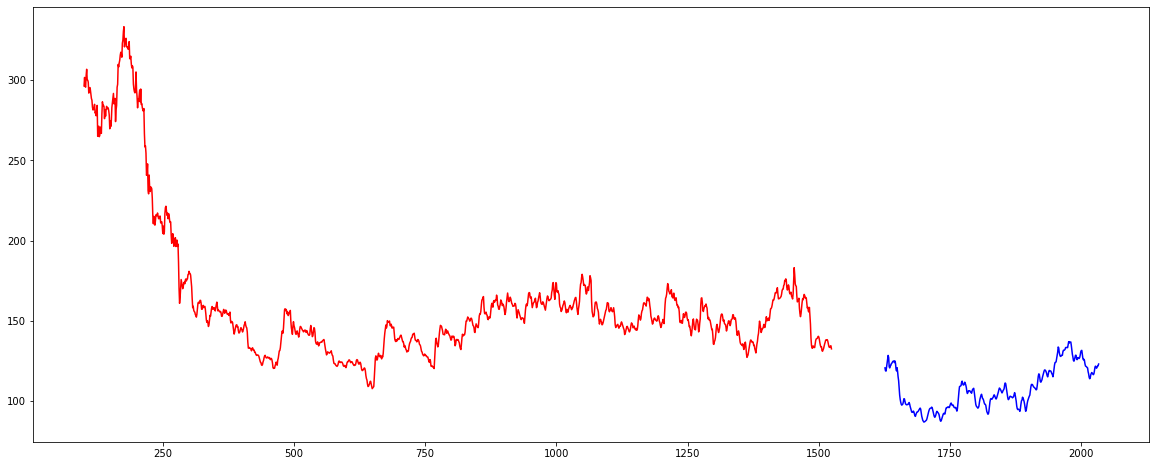

In [36]:
plt.subplots(figsize=(20,8))
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='blue')
plt.show()

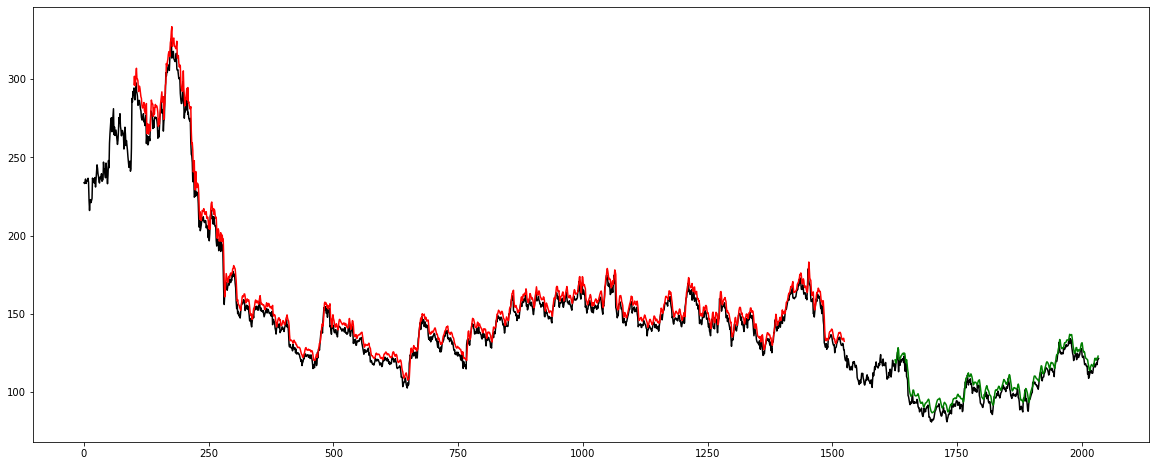

In [37]:
# Baseline and predictions
plt.subplots(figsize=(20,8))
plt.plot(scaler.inverse_transform(df1), color = 'black')
plt.plot(trainPredictPlot, color = 'red')
plt.plot(testPredictPlot, color = 'green')
plt.show()

In [38]:
len(test_data)

509

In [39]:
x_input=test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [40]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.12479575163398693,
 0.1384803921568627,
 0.14011437908496732,
 0.1388888888888889,
 0.13541666666666663,
 0.14011437908496732,
 0.13807189542483655,
 0.130718954248366,
 0.130718954248366,
 0.12867647058823528,
 0.11846405228758167,
 0.14644607843137253,
 0.1480800653594771,
 0.159109477124183,
 0.15992647058823523,
 0.1578839869281045,
 0.16441993464052285,
 0.178921568627451,
 0.17933006535947704,
 0.19260620915032678,
 0.2081290849673203,
 0.18974673202614378,
 0.18055555555555558,
 0.1823937908496731,
 0.17708333333333326,
 0.17810457516339862,
 0.18055555555555558,
 0.17810457516339862,
 0.17851307189542487,
 0.196078431372549,
 0.18913398692810457,
 0.1895424836601307,
 0.19403594771241828,
 0.19444444444444442,
 0.20200163398692816,
 0.19771241830065356,
 0.19934640522875813,
 0.19873366013071891,
 0.19975490196078427,
 0.21282679738562094,
 0.21568627450980393,
 0.2044526143790849,
 0.21772875816993464,
 0.21098856209150318,
 0.21425653594771243,
 0.1975081699346406,
 0.1881

# Demonstrate prediction for next 30 days

In [41]:
from numpy import array

list_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        list_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        list_output.extend(yhat.tolist())
        i=i+1
    
print(list_output)

[0.18027423]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

In [42]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [43]:
len(df1)

2035

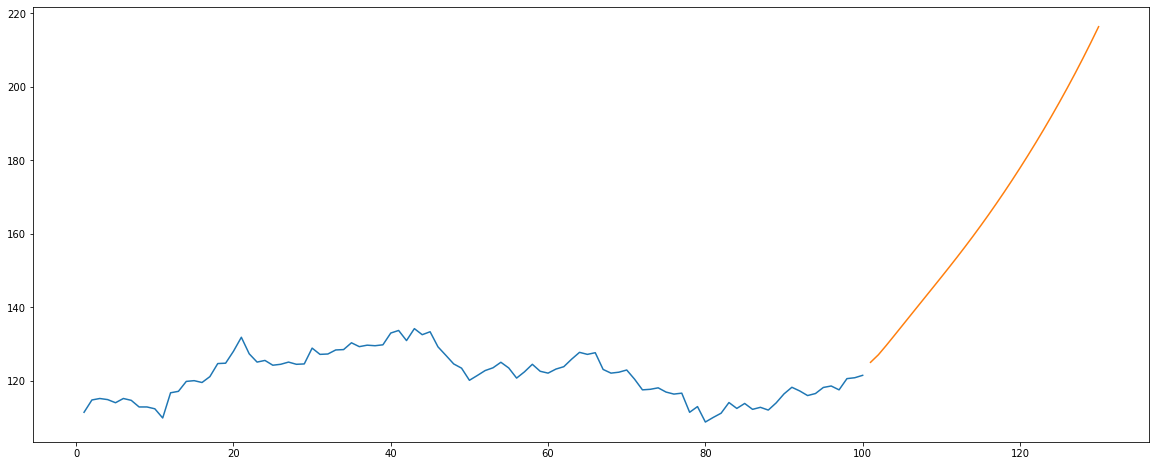

In [44]:
plt.subplots(figsize=(20,8))
plt.plot(day_new,scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred,scaler.inverse_transform(list_output))

# THANK YOU